<a href="https://colab.research.google.com/github/shurmez01/MAT422/blob/main/1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.4 Principal Component Analysis**

1.4.1 Singular Value Decomposition
Let A be an m × n matrix.Then AT A is symmetric and can be orthogonally
diagonalized. Let v1, ..., vn be an orthonormal basis for Rn consisting of eigen-
vectors of AT A, and let
λ1, ...,
λn be the associated eigenvalues of AT A. Then,
for 1 ≤ i ≤ n, ∥Avi∥2 = (Avi)T Avi = vT
i AT Avi
= vT
i (
λivi) since vi is an eigenvectors of AT A
=
λi since vi is a unit vector
(1.4.1)
So the eigenvalues of A are all nonnegative.


In [4]:
print(__doc__)


# Code source: Gaël Varoquaux
# Link: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

# initiate random numbers, with the seed reset (every time),
# the same set of numbers will appear every time.
np.random.seed(5)

# load the Iris dataset
centers = [[5, 5], [-5, -5], [5, -5]]
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.data.shape

Automatically created module for IPython interactive environment


(150, 4)

<ipython-input-5-f9cc1ec70d46>:25: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-5-f9cc1ec70d46>:26: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-5-f9cc1ec70d46>:27: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


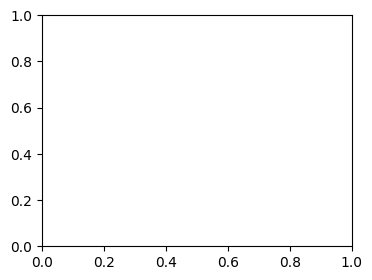

In [5]:
# set the canvas for the figures we are going to make
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

# fit the iris data to the PCA model
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

# plot the result
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

(1797, 64)
(1797, 3)


<ipython-input-12-06393e3c2c12>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


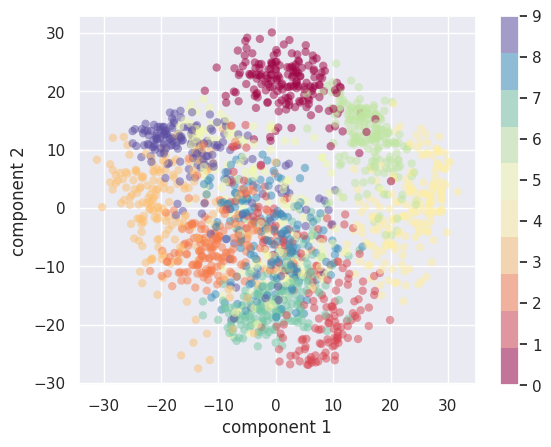

In [12]:
# PCA for visualization: Hand-written digits
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

# We can now plot the first two principal components of each point to learn about the data
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();
